In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import random
import os
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [2]:
data_path = '/kaggle/input/breast-histopathology-images/'

In [3]:
import os
import pandas as pd

def main(data_path):
    filepaths = []
    labels = []
    
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                label = os.path.basename(os.path.dirname(file_path))
                if label in ['0', '1']:
                    filepaths.append(file_path)
                    labels.append(label)
    
    train_df = pd.DataFrame({
        'image_path': filepaths,
        'label': labels
    })
    
    return train_df

In [4]:
data_df = main(data_path)

In [5]:
data_df

image_path label
0       /kaggle/input/breast-histopathology-images/102...     0
1       /kaggle/input/breast-histopathology-images/102...     0
2       /kaggle/input/breast-histopathology-images/102...     0
3       /kaggle/input/breast-histopathology-images/102...     0
4       /kaggle/input/breast-histopathology-images/102...     0
...                                                   ...   ...
555043  /kaggle/input/breast-histopathology-images/128...     1
555044  /kaggle/input/breast-histopathology-images/128...     1
555045  /kaggle/input/breast-histopathology-images/128...     1
555046  /kaggle/input/breast-histopathology-images/128...     1
555047  /kaggle/input/breast-histopathology-images/128...     1

[555048 rows x 2 columns]

In [6]:
num_classes = len(data_df['label'].unique())
print(f"We have {num_classes} classes")
print(f"We have {data_df.shape[0]} images")

We have 2 classes
We have 555048 images


In [7]:
data_df['label'].unique()

array(['0', '1'], dtype=object)

In [8]:
data_df['label'].value_counts()

0    397476
1    157572
Name: label, dtype: int64

In [9]:
import plotly.express as px
import plotly.graph_objs as go

def count_plot(x, title, xlabel, ylabel, width, length, order, rotation=True, palette='winter'):
    
    fig = px.histogram(x=x, color_discrete_sequence=px.colors.qualitative.Plotly, 
                       color=x, nbins=len(set(x)), template='simple_white')
    
    fig.update_layout(title=title, width=width, height=length, 
                      xaxis_title=xlabel, yaxis_title=ylabel,
                      font=dict(size=20))
    
    if rotation:
        fig.update_layout(xaxis_tickangle=-45)
    
    fig.show()

In [10]:
x = data_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Train Data)", "Label", 'Frequency', 800,600, order=order, rotation = True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
test_split_size = 0.3
train_df, test_df = train_test_split(data_df, test_size=test_split_size, shuffle=True, random_state=123, stratify=data_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [13]:
train_df.head()

image_path label
413057  /kaggle/input/breast-histopathology-images/IDC...     0
359576  /kaggle/input/breast-histopathology-images/IDC...     0
355059  /kaggle/input/breast-histopathology-images/IDC...     0
472652  /kaggle/input/breast-histopathology-images/IDC...     0
363500  /kaggle/input/breast-histopathology-images/IDC...     0

In [14]:
train_df.tail()

image_path label
373508  /kaggle/input/breast-histopathology-images/IDC...     0
512532  /kaggle/input/breast-histopathology-images/IDC...     0
455862  /kaggle/input/breast-histopathology-images/IDC...     0
323408  /kaggle/input/breast-histopathology-images/IDC...     0
528834  /kaggle/input/breast-histopathology-images/IDC...     0

In [15]:
train_df['label'].value_counts()

0    278233
1    110300
Name: label, dtype: int64

In [16]:
test_df.head()

image_path label
442294  /kaggle/input/breast-histopathology-images/IDC...     0
319965  /kaggle/input/breast-histopathology-images/IDC...     0
200690  /kaggle/input/breast-histopathology-images/925...     1
52834   /kaggle/input/breast-histopathology-images/136...     0
413890  /kaggle/input/breast-histopathology-images/IDC...     0

In [17]:
test_df.tail()

image_path label
8555    /kaggle/input/breast-histopathology-images/932...     0
202397  /kaggle/input/breast-histopathology-images/917...     0
229491  /kaggle/input/breast-histopathology-images/128...     0
425884  /kaggle/input/breast-histopathology-images/IDC...     0
450625  /kaggle/input/breast-histopathology-images/IDC...     0

In [18]:
test_df['label'].value_counts()

0    59621
1    23636
Name: label, dtype: int64

In [19]:
valid_df.head()

image_path label
545846  /kaggle/input/breast-histopathology-images/129...     0
439709  /kaggle/input/breast-histopathology-images/IDC...     0
22784   /kaggle/input/breast-histopathology-images/938...     1
414508  /kaggle/input/breast-histopathology-images/IDC...     0
49238   /kaggle/input/breast-histopathology-images/102...     0

In [20]:
valid_df.tail()

image_path label
554309  /kaggle/input/breast-histopathology-images/903...     0
244626  /kaggle/input/breast-histopathology-images/102...     0
331728  /kaggle/input/breast-histopathology-images/IDC...     1
194764  /kaggle/input/breast-histopathology-images/902...     0
98199   /kaggle/input/breast-histopathology-images/136...     0

In [21]:
valid_df['label'].value_counts()

0    59622
1    23636
Name: label, dtype: int64

In [22]:
print(f"We have {len(train_df)} images in the training dataset\nWe have {len(valid_df)} images in the validating dataset\nWe have {len(test_df)} images in the testing dataset")

We have 388533 images in the training dataset
We have 83258 images in the validating dataset
We have 83257 images in the testing dataset


In [23]:
x = train_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Train Data)", "Label", 'Frequency', 800,600, rotation = True, order=order)

In [24]:
x = valid_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Valid Data)", "Label", 'Frequency', 800,600, rotation = True, order=order)

In [25]:
x = test_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Test Data)", "Label", 'Frequency', 800,600, rotation = True, order=order)

In [26]:
test_split_size = 0.3
train_df, test_df = train_test_split(test_df, test_size=test_split_size, shuffle=True, random_state=123, stratify=test_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [27]:
train_df['label'].value_counts()

0    41734
1    16545
Name: label, dtype: int64

In [28]:
test_df['label'].value_counts()

0    8943
1    3546
Name: label, dtype: int64

In [29]:
valid_df['label'].value_counts()

0    8944
1    3545
Name: label, dtype: int64

In [30]:
test_split_size = 0.3
train_df, test_df = train_test_split(train_df, test_size=test_split_size, shuffle=True, random_state=123, stratify=train_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [31]:
train_df['label'].value_counts()

0    29214
1    11581
Name: label, dtype: int64

In [32]:
test_df['label'].value_counts()

0    6260
1    2482
Name: label, dtype: int64

In [33]:
valid_df['label'].value_counts()

0    6260
1    2482
Name: label, dtype: int64

In [34]:
img_size = (50, 50)
channels = 3
color = 'rgb'
img_shape = (img_size[0], img_size[1], channels)
batch_size = 32
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
def scalar(img):
    return img

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [36]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)

Found 40795 validated image filenames belonging to 2 classes.
Found 8742 validated image filenames belonging to 2 classes.
Found 8742 validated image filenames belonging to 2 classes.


In [37]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [38]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [39]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [41]:
history = model.fit(x= train_gen, 
                    epochs= 5, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/5


2023-04-30 10:58:49.469072: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1275/1275 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8257
Epoch 1: val_loss improved from inf to 0.37022, saving model to model_weights.h5
1275/1275 [==============================] - 182s 132ms/step - loss: 0.4158 - accuracy: 0.8257 - val_loss: 0.3702 - val_accuracy: 0.8443
Epoch 2/5
1275/1275 [==============================] - ETA: 0s - loss: 0.3673 - accuracy: 0.8458
Epoch 2: val_loss improved from 0.37022 to 0.36983, saving model to model_weights.h5
1275/1275 [==============================] - 55s 43ms/step - loss: 0.3673 - accuracy: 0.8458 - val_loss: 0.3698 - val_accuracy: 0.8466
Epoch 3/5
1274/1275 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8499
Epoch 3: val_loss improved from 0.36983 to 0.36438, saving model to model_weights.h5
1275/1275 [==============================] - 53s 41ms/step - loss: 0.3514 - accuracy: 0.8500 - val_loss: 0.3644 - val_accuracy: 0.8408
Epoch 4/5
1275/1275 [==============================] - ETA: 0

In [42]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

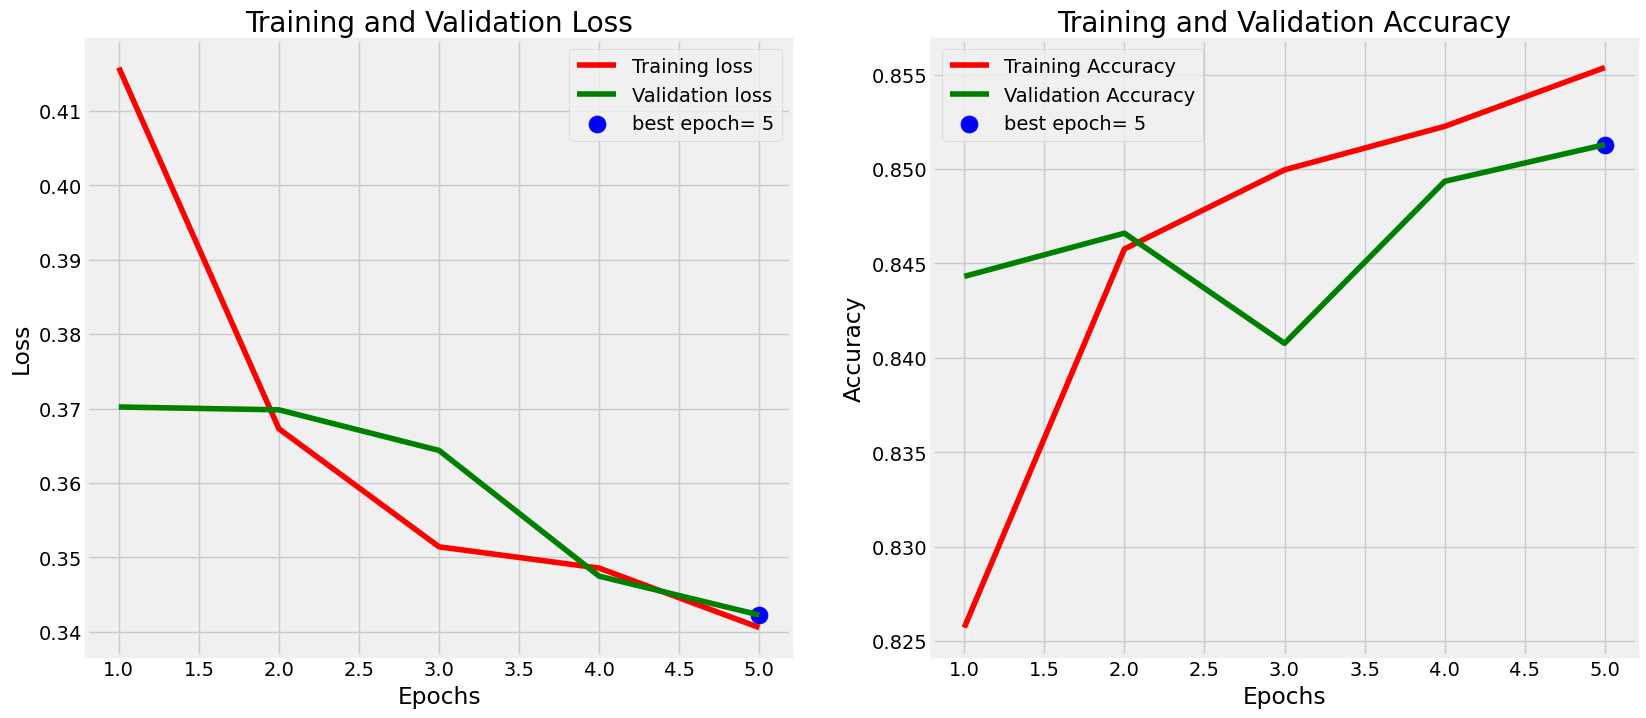

In [43]:
plot_training(history)

In [44]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

141/141 [==============================] - 29s 208ms/step - loss: 0.3312 - accuracy: 0.8559
Train Loss:  0.3291209936141968
Train Accuracy:  0.8648049831390381
--------------------
Validation Loss:  0.3416573405265808
Validation Accuracy:  0.8559397459030151
--------------------
Test Loss:  0.33120134472846985
Test Accuracy:  0.8558682203292847


In [45]:
y_pred = model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

141/141 [==============================] - 8s 57ms/step


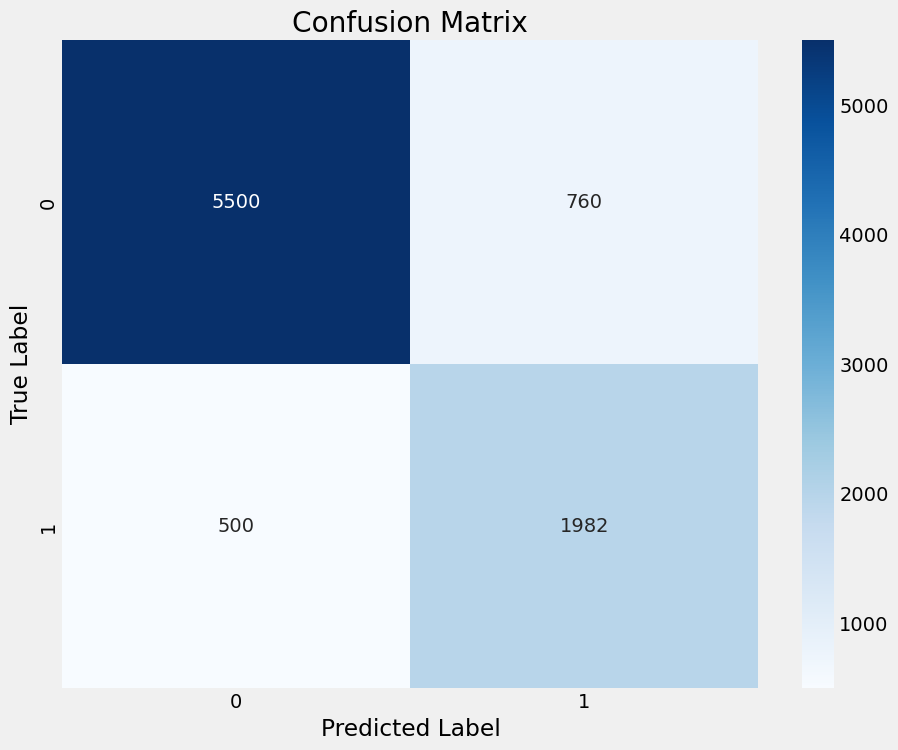

In [46]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6260
           1       0.72      0.80      0.76      2482

    accuracy                           0.86      8742
   macro avg       0.82      0.84      0.83      8742
weighted avg       0.86      0.86      0.86      8742



In [48]:
img_shape = (50, 50, 3)

In [49]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')

80134624/80134624 [==============================] - 0s 0us/step


In [50]:
model = Sequential()
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [51]:
combined_model = Sequential()
combined_model.add(base_model)
combined_model.add(model)

In [52]:
for layer in combined_model.layers[0].layers:
    layer.trainable = False

In [53]:
combined_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
print(combined_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 sequential_1 (Sequential)   (None, 2)                 131842    
                                                                 
Total params: 20,156,226
Trainable params: 131,842
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [55]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)


history = combined_model.fit(x= train_gen, 
                    epochs= 2, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/2
1275/1275 [==============================] - ETA: 0s - loss: 0.8586 - accuracy: 0.7911
Epoch 1: val_loss improved from inf to 0.40540, saving model to model_weights.h5
1275/1275 [==============================] - 57s 43ms/step - loss: 0.8586 - accuracy: 0.7911 - val_loss: 0.4054 - val_accuracy: 0.8300
Epoch 2/2
1274/1275 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8224
Epoch 2: val_loss improved from 0.40540 to 0.40453, saving model to model_weights.h5
1275/1275 [==============================] - 54s 42ms/step - loss: 0.4174 - accuracy: 0.8223 - val_loss: 0.4045 - val_accuracy: 0.8238


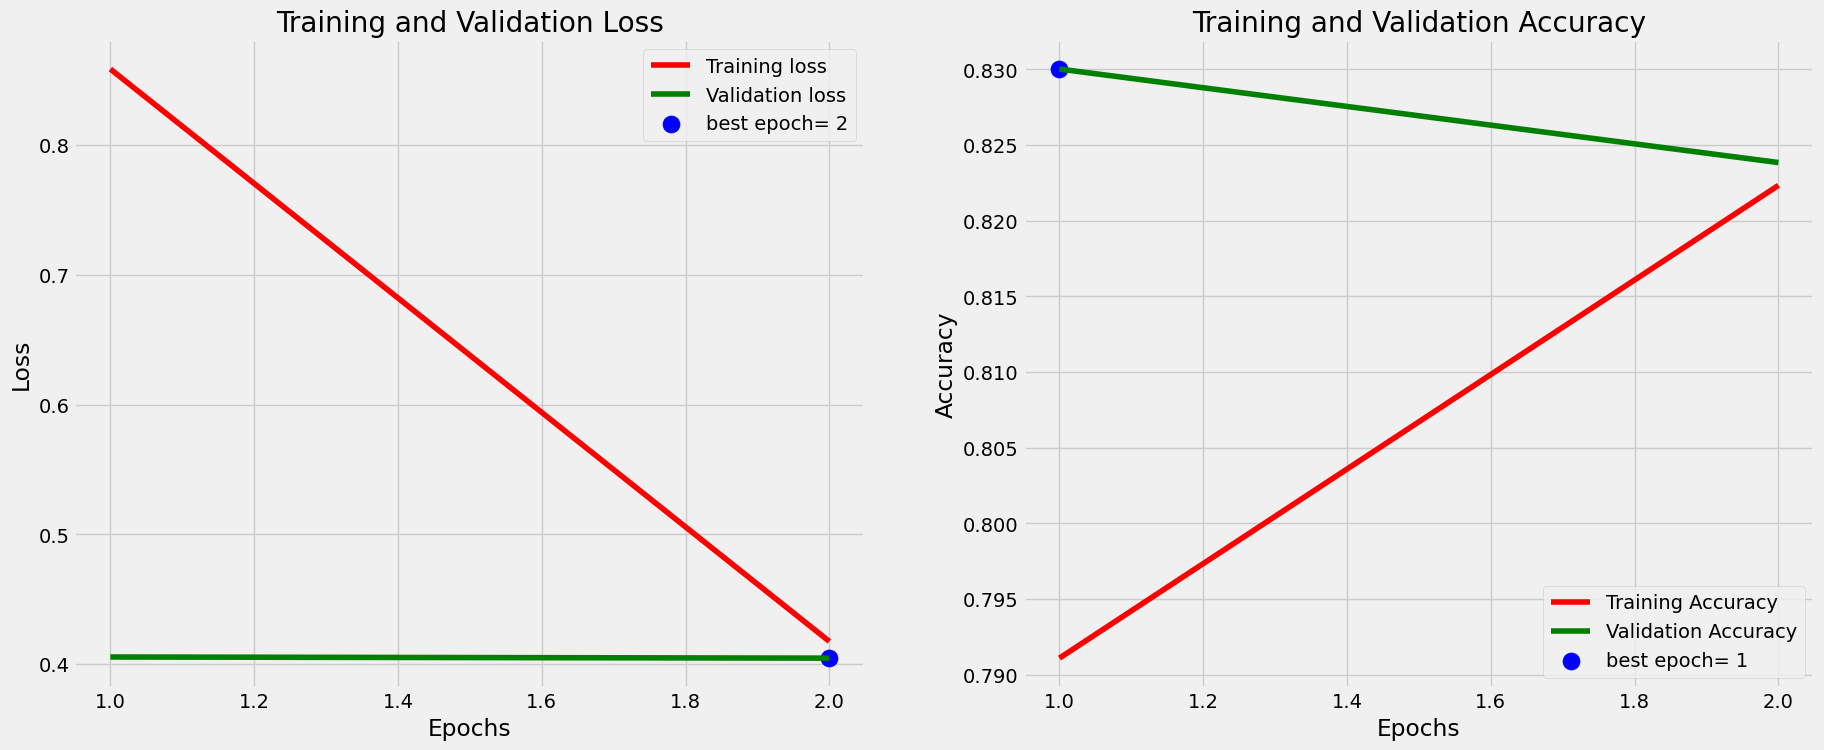

In [56]:
plot_training(history)

In [57]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = combined_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = combined_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = combined_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

141/141 [==============================] - 10s 62ms/step - loss: 0.4106 - accuracy: 0.8216
Train Loss:  0.39557576179504395
Train Accuracy:  0.8280141949653625
--------------------
Validation Loss:  0.4093336760997772
Validation Accuracy:  0.8171542286872864
--------------------
Test Loss:  0.4106069803237915
Test Accuracy:  0.8215511441230774


In [58]:
y_pred = combined_model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

141/141 [==============================] - 9s 64ms/step


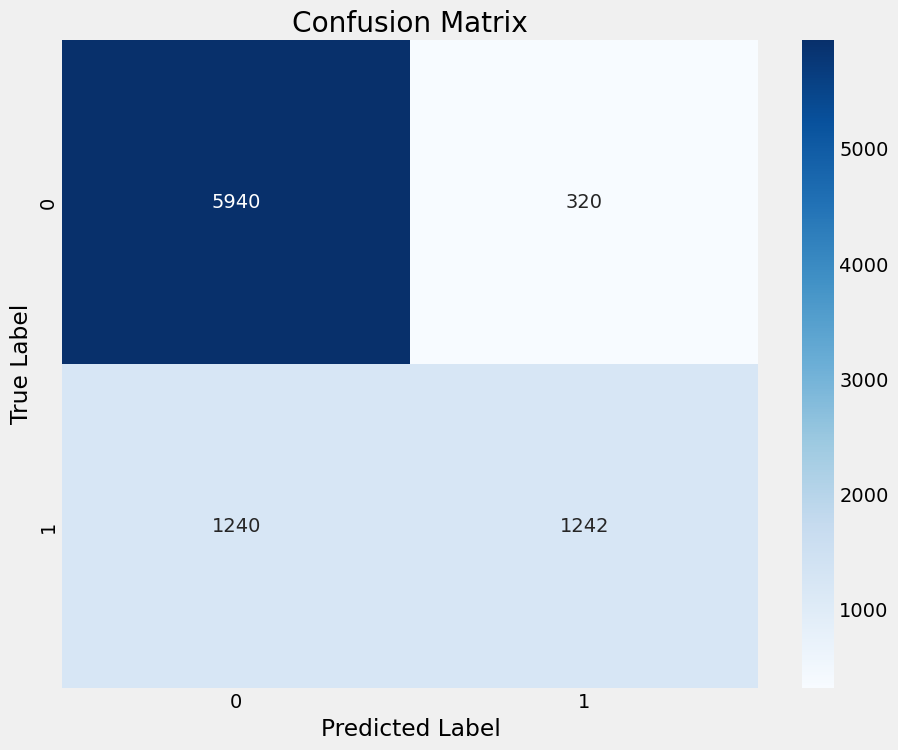

In [59]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6260
           1       0.80      0.50      0.61      2482

    accuracy                           0.82      8742
   macro avg       0.81      0.72      0.75      8742
weighted avg       0.82      0.82      0.81      8742



In [61]:
img_shape = (75, 75, 3)

In [62]:
base_model = tf.keras.applications.InceptionV3(include_top=False, 
                                               weights='imagenet', 
                                               input_shape=img_shape, 
                                               pooling='max')

87910968/87910968 [==============================] - 0s 0us/step


In [63]:
model = Sequential()
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [64]:
combined_model = Sequential()
combined_model.add(base_model)
combined_model.add(model)

In [65]:
for layer in combined_model.layers[0].layers:
    layer.trainable = False

In [66]:
combined_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
print(combined_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 sequential_3 (Sequential)   (None, 2)                 525058    
                                                                 
Total params: 22,327,842
Trainable params: 525,058
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [68]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)

history = combined_model.fit(x= train_gen, 
                    epochs= 5, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/5
1275/1275 [==============================] - ETA: 0s - loss: nan - accuracy: 0.7161
Epoch 1: val_loss did not improve from inf
1275/1275 [==============================] - 63s 45ms/step - loss: nan - accuracy: 0.7161 - val_loss: nan - val_accuracy: 0.7161
Epoch 2/5
1274/1275 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.7162
Epoch 2: val_loss did not improve from inf
1275/1275 [==============================] - 56s 44ms/step - loss: nan - accuracy: 0.7161 - val_loss: nan - val_accuracy: 0.7161
Epoch 3/5
1275/1275 [==============================] - ETA: 0s - loss: nan - accuracy: 0.7161
Epoch 3: val_loss did not improve from inf
1275/1275 [==============================] - 57s 44ms/step - loss: nan - accuracy: 0.7161 - val_loss: nan - val_accuracy: 0.7161
Epoch 4/5
1274/1275 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.7161
Epoch 4: val_loss did not improve from inf
1275/1275 [==============================] - 56s 44ms/step - loss

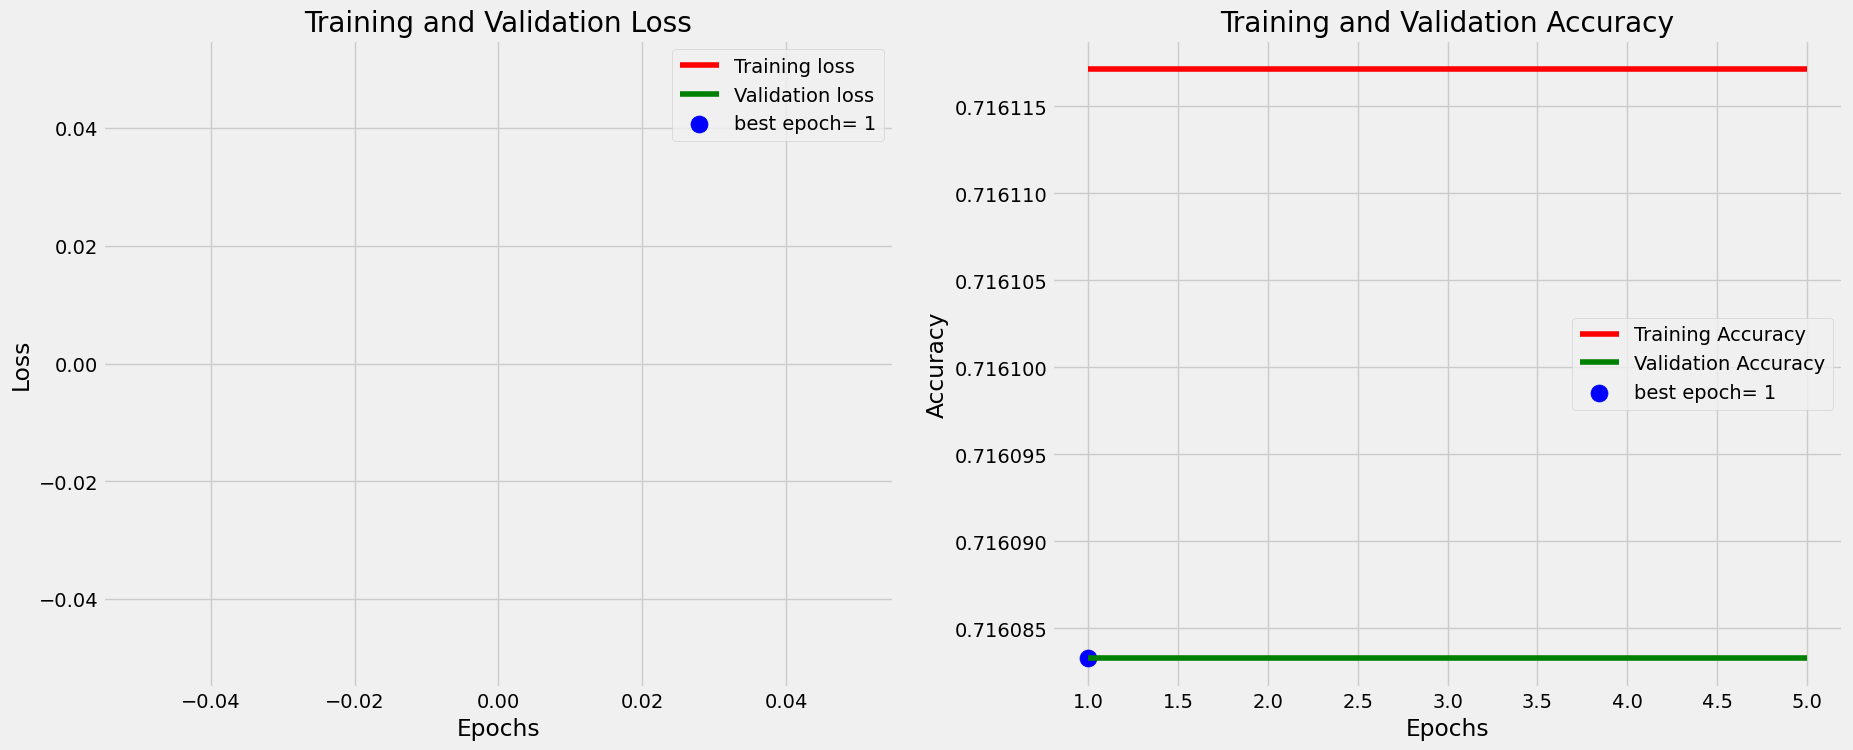

In [69]:
plot_training(history)

In [70]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = combined_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = combined_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = combined_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

141/141 [==============================] - 9s 63ms/step - loss: nan - accuracy: 0.7161
Train Loss:  nan
Train Accuracy:  0.714982271194458
--------------------
Validation Loss:  nan
Validation Accuracy:  0.7220744490623474
--------------------
Test Loss:  nan
Test Accuracy:  0.716083288192749


In [71]:
y_pred = combined_model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

141/141 [==============================] - 10s 63ms/step


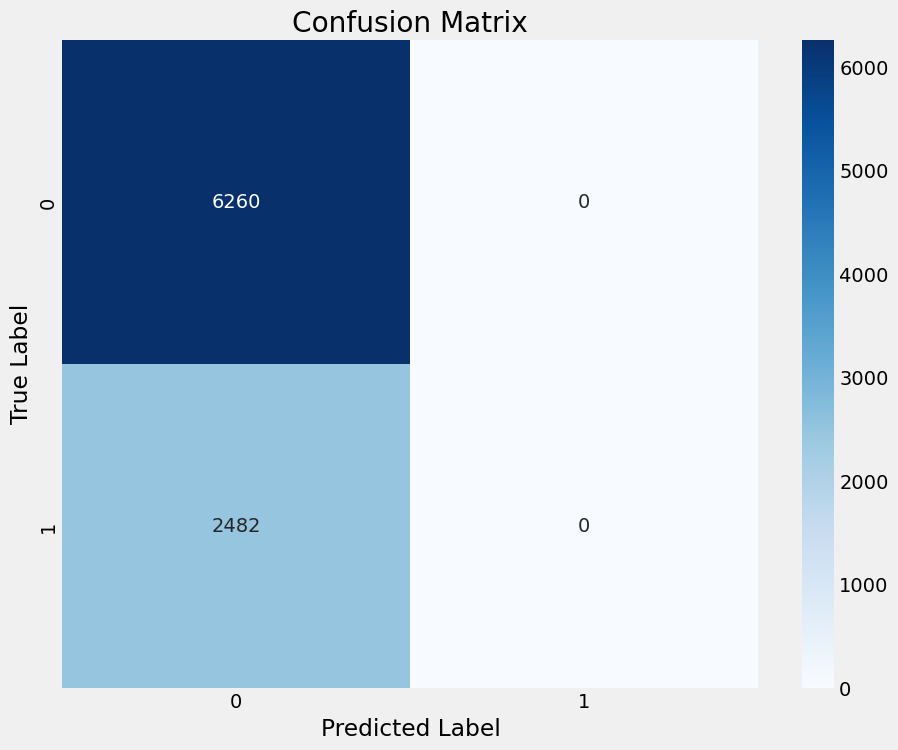

In [72]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      6260
           1       0.00      0.00      0.00      2482

    accuracy                           0.72      8742
   macro avg       0.36      0.50      0.42      8742
weighted avg       0.51      0.72      0.60      8742



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [74]:
base_model = tf.keras.applications.InceptionV3(include_top=False, 
                                               weights='imagenet', 
                                               input_shape=img_shape, 
                                               pooling='max')

In [75]:
class_count = len(list(train_gen.class_indices.keys()))

In [76]:
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, 
          kernel_regularizer= regularizers.l2(l= 0.016), 
          activity_regularizer= regularizers.l1(0.006),
          bias_regularizer= regularizers.l1(0.006), 
          activation= 'relu'),
    
    Dropout(rate= 0.45, 
            seed= 123),
    
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 batch_normalization_194 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_9 (Dense)             (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 2)                 514       
                                                                 
Total params: 22,336,034
Trainable params: 22,297,506
Non-trainable params: 38,528
_____________________________________

In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [78]:
history = model.fit(x= train_gen, 
                    epochs= 5, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/5
